<a href="https://colab.research.google.com/github/BobChrismansyah/Data-Mining/blob/main/TugasPertemuan8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

|Nama : Bob Chrismansyah Pata'dungan Kabanga|
|-------------------------------------------|
|NIM : H071201087|

## Classification

Classification adalah tindakan untuk memberikan kelompok pada setiap keadaan. Setiap keadaan berisi sekelompok atribut, salah satunya adalah class attribute. Metode ini butuh untuk menemukan sebuah model yang dapat menjelaskan class attribute itu sebagai fungsi dari input attribute.

Classification dapat didefinisikan sebagai proses memprediksi kelas atau kategori dari nilai yang diamati atau titik data yang diberikan. Output yang dikategorikan dapat memiliki bentuk seperti “Black” atau “White” atau “spam” atau “no spam”. 

Secara matematis, classification adalah tugas mendekati fungsi pemetaan (f) dari variabel input (X) ke variabel output (Y). Ini pada dasarnya milik pembelajaran mesin yang diawasi di mana target juga disediakan bersama dengan set data input.






In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
X, y = make_classification(n_samples=1000, n_classes=3, n_features=20, n_informative=3, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)
y_pred_proba_positive = pred_prob[:,1] # Estimated probabilities of positive samples
y_true = y_test

In [ ]:
from sklearn.metrics import accuracy_score
CA=accuracy_score(y_true, pred)                        # Classification Accuracy
NCCS=accuracy_score(y_true, pred, normalize=False)     # Number of correctly classified samples

1. Accuracy

Accuracy merupakan rasio prediksi benar (positif dan negatif) dengan keseluruhan data. Akurasi menjawab pertanyaan “Berapa persen mahasiswa yang benar diprediksi DO dan Tidak DO dari kesuluruhan mahasiswa”

In [ ]:
CA

0.6175

In [ ]:
NCCS

247

2. Precision Recall, dan F1-Score

precision adalah perbandingan antara True Positive (TP) dengan banyaknya data yang diprediksi positif.  atau dapat dituliskan _precision = TP/TP+FP_

Precision merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan hasil yang diprediksi positf. Precission menjawab pertanyaan “Berapa persen mahasiswa yang benar DO dari keseluruhan mahasiswa yang diprediksi DO?”

Recall, secara definisi adalah perbandingan antara True Positive (TP) dengan banyaknya data yang sebenarnya positif. Dan dapat dituliskan secara matematis seperti ini: _recall = TP/TP+FN_

Recall merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan data yang benar positif. Recall menjawab pertanyaan “Berapa persen mahasiswa yang diprediksi DO dibandingkan keseluruhan mahasiswa yang sebenarnya DO”.

F1 Score merupakan perbandingan rata-rata presisi dan recall yang dibobotkan. Skor F1 memberikan hasil gabungan Precision dan Recall.
Nilai terbaik F1-Score adalah 1.0 dan nilai terburuknya adalah 0. Secara representasi, jika F1-Score punya skor yang baik mengindikasikan bahwa model klasifikasi kita punya precision dan recall yang baik. 

In [ ]:
labels = ["label_1","label_12","label_3"]

In [ ]:
print(classification_report(y_true, pred, target_names=labels))

              precision    recall  f1-score   support

     label_1       0.62      0.71      0.66       133
    label_12       0.45      0.29      0.36       130
     label_3       0.70      0.84      0.76       137

    accuracy                           0.62       400
   macro avg       0.59      0.61      0.59       400
weighted avg       0.59      0.62      0.60       400



3. Confusion Matrix

Confusion Matrix adalah pengukuran performa untuk masalah klasifikasi machine learning dimana keluaran dapat berupa dua kelas atau lebih.  Confusion Matrix adalah tabel dengan 4 kombinasi berbeda dari nilai prediksi dan nilai aktual. 

Dihitung dengan fungsi penambangan Klasifikasi. Ini menampilkan distribusi catatan dalam hal kelas aktual dan kelas prediksi mereka. Ini menunjukkan kualitas model saat ini. Sebuah model dapat berisi dua atau lebih kelas prediksi.

Model yang dihasilkan sudah dapat berisi subpohon yang dipangkas. Fungsi penambangan menghitung matriks kebingungan dan menyimpan informasi ini dalam model klasifikasi. Matriks kebingungan ini ditunjukkan pada bagian Matriks kebingungan seperti yang ditemukan dalam model .

Ada empat istilah yang merupakan representasi hasil proses klasifikasi pada confusion matrix yaitu True Positif, True Negatif, False Positif, dan False Negatif. 

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(pred, y_true)
cm

array([[ 94,  50,   7],
       [ 31,  38,  15],
       [  8,  42, 115]])

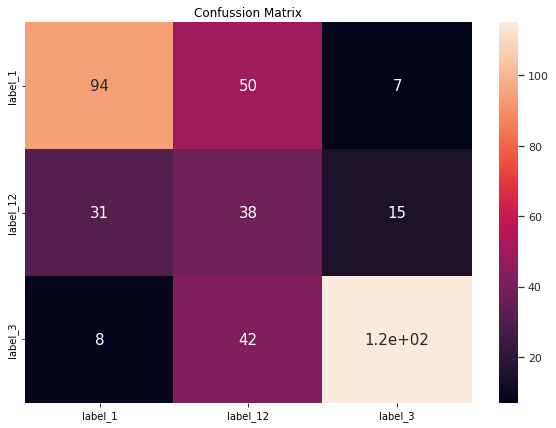

In [ ]:
  import seaborn as sns

  #Visualisasi Confussion Matrix
  model_df_cm = pd.DataFrame(cm, labels, labels) 
  plt.figure(figsize = (10,7))
  plt.title('Confussion Matrix') 
  sns.set(font_scale=1) #for label size 
  sns.heatmap(model_df_cm, annot=True, annot_kws={"size": 15}) # font size 
  plt.show()

4. ROC-Curve

ROC adalah representasi grafis dari hubungan antara sensitivitas dan 1-spesifisitas. Dalam penelitian medis kurva ROC banyak digunakan untuk menggambarkan keakuratan diagnostik dan menentukan nilai cut-off yang optimal. Keakuratan diagnosis berasal dari area di bawah kurva ROC dan optimal cut-off digunakan untuk mengidentifikasi kondisi positif dan negatif dalam diagnosis. Kurva Receiver Operator Characteristic (ROC) adalah plot grafis yang digunakan untuk menunjukkan kemampuan diagnostik pengklasifikasi biner. Ini pertama kali digunakan dalam teori deteksi sinyal tetapi sekarang digunakan di banyak bidang lain seperti kedokteran, radiologi, bahaya alam, dan pembelajaran mesin. Dalam posting ini saya akan menunjukkan kepada Anda bagaimana kurva ROC dibuat dan bagaimana menafsirkan kurva ROC. 

In [ ]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

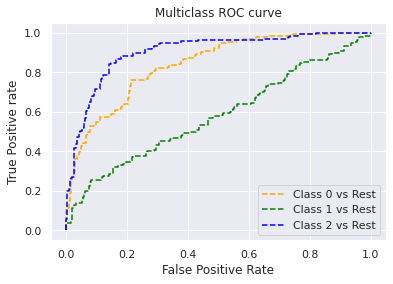

In [ ]:
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

## **Regresi/Estimasi**

Model regresi linier merupakan model yang paling sering digunakan dalam analisis statistika. Model regresi linier ini digunakan untuk menyatakan hubungan fungsional antara satu atau beberapa variabel bebas (prediktor) terhadap satu variabel terikat (respon). Dalam analisis regresi, mengestimasi parameter secara otomatis mengestimasi model regresi. Untuk memperoleh estimasi model regresi dapat dilakukan dengan beberapa metode antara lain: metode kuadrat terkecil, metode maksimum likelihood dan sebagainya. Salah satu metode yang paling populer adalah metode kuadrat terkecil (OLS). 

In [ ]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [ ]:
data_1 = pd.DataFrame([[8, 7], [2, 3], [6, 7], [9, 10], [4, 2], [5, 6], [7, 8], [3, 3]])
data_1.columns = ['Kamera(x)', 'Harga(y)']
data_1

,Kamera(x),Harga(y)
0,8,7
1,2,3
2,6,7
3,9,10
4,4,2
5,5,6
6,7,8
7,3,3


In [ ]:
X = data_1["Kamera(x)"].values[:, np.newaxis]
y = data_1["Harga(y)"].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =  0.2)

In [ ]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.7499999999999993


In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.5902777777777769


In [ ]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.7682953714410734


In [ ]:
print("Log RMSE",np.log(np.sqrt(mean_squared_error(y_test,y_pred))))

Log RMSE -0.2635810215428428


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.9518140589569162


In [ ]:
n=40
k=2
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print(adj_r2_score)

0.9492094134951279


## **Clustering**

Clustering merupakan proses partisi satu set objek data ke dalam himpunan bagian yang disebut dengan cluster. Objek yang di dalam cluster memiliki kemiripan karakteristik antar satu sama lainnya dan berbeda dengan cluster yang lain. Partisi tidak dilakukan secara manual melainkan dengan suatu algoritma clustering. Oleh karena itu, clustering sangat berguna dan bisa menemukan group atau kelompokyang tidak dikenal dalam data

In [ ]:
# Import data
df = pd.read_csv("Fish.csv")
#  Tampilkan 5 data pertama
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
# hapus atribut yang tidak digunakan
df.drop(['Species'], axis=1, inplace=True)

# tampilkan 5 data pertama
df.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
from sklearn.preprocessing import StandardScaler

df_scale = df[['Weight', 'Length1', 'Length2', 'Length3','Height', 'Width']]

# instantiating the scaler
scaler = StandardScaler()

# fit and transform
df_scale = scaler.fit_transform(df_scale)
df_scale.shape

(159, 6)

In [ ]:
df_scale[:5]

array([[-0.43807217, -0.30578858, -0.28230301, -0.10602023,  0.59657867,
        -0.23652895],
       [-0.30356218, -0.22550724, -0.19805366, -0.00233668,  0.82126055,
        -0.06657895],
       [-0.16344761, -0.23554241, -0.17933159, -0.01097698,  0.79734129,
         0.16579317],
       [-0.09899491,  0.0053016 ,  0.05469437,  0.19639012,  0.87977146,
         0.022621  ],
       [ 0.08875862,  0.02537193,  0.05469437,  0.23959159,  0.81283498,
         0.42637127]])

In [ ]:
data = pd.DataFrame(df_scale)
data.columns = ['Weight', 'Length1', 'Length2', 'Length3','Height', 'Width']

data_cluster = data.copy()
data.head()

,Weight,Length1,Length2,Length3,Height,Width
0,-0.438072,-0.305789,-0.282303,-0.106020,0.596579,-0.236529
1,-0.303562,-0.225507,-0.198054,-0.002337,0.821261,-0.066579
2,-0.163448,-0.235542,-0.179332,-0.010977,0.797341,0.165793
3,-0.098995,0.005302,0.054694,0.196390,0.879771,0.022621
4,0.088759,0.025372,0.054694,0.239592,0.812835,0.426371


In [ ]:
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,1.590000e+02,1.590000e+02,1.590000e+02,1.590000e+02,1.590000e+02,1.590000e+02
mean,4.329172e-17,-1.564088e-16,-1.326682e-16,1.955110e-17,-9.496247e-17,-2.290271e-16
std,1.003160e+00,1.003160e+00,1.003160e+00,1.003160e+00,1.003160e+00,1.003160e+00
min,-1.116227e+00,-1.881310e+00,-1.873679e+00,-1.937763e+00,-1.695083e+00,-2.005294e+00
25%,-7.799517e-01,-7.222480e-01,-6.941887e-01,-6.978805e-01,-7.082613e-01,-6.140072e-01
50%,-3.512011e-01,-1.050852e-01,-1.044433e-01,-1.578620e-01,-2.773402e-01,-1.005570e-01
75%,7.052627e-01,6.475523e-01,6.631618e-01,7.277683e-01,7.945562e-01,6.944472e-01
max,3.507554e+00,3.286801e+00,3.274892e+00,3.177292e+00,2.337161e+00,2.216321e+00


In [ ]:
 data = df.copy()
 data_cluster = df.copy()

1. Elbow Method

Elbow method adalah metoda yang sering dipakai untuk menentukan jumlah cluster yang akan digunakan pada k-means clustering.

Seperti yang sudah dibahas sebelumnya, clustering adalah meminimumkan jarak antara data point dan centroid, serta memaksimumkan jarak antara centroid yang dihitung menggunakan within-cluster sum of squares atau WCSS.

Tujuannya adalah menghitung WCSS se-minimum dengan jumlah cluster yang kecil agar bisa dilakukan interpretasi data.

Text(0, 0.5, 'Inertia')

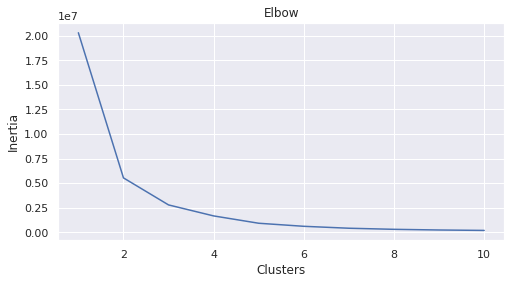

In [ ]:
# Menentukan jumlah K
from sklearn.cluster import KMeans

# buat list inertia
clusters = []
for i in range (1,11):
    km = KMeans(n_clusters=i).fit(data)
    clusters.append(km.inertia_)

# tampilkan plot
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [ ]:
## Melatih model
# Create Model
model_kmeans3 = KMeans(n_clusters=3)
model_kmeans4 = KMeans(n_clusters=4)

# Train Model
model_kmeans3.fit(data)
model_kmeans4.fit(data)

# Menambah Label pada data
data_cluster['cluster_kmeans3'] = model_kmeans3.labels_
data_cluster['cluster_kmeans4'] = model_kmeans4.labels_

data_cluster

,Weight,Length1,Length2,Length3,Height,Width,cluster_kmeans3,cluster_kmeans4
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,3
4,430.0,26.5,29.0,34.0,12.4440,5.1340,2,3
...,...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,1,0
155,13.4,11.7,12.4,13.5,2.4300,1.2690,1,0
156,12.2,12.1,13.0,13.8,2.2770,1.2558,1,0
157,19.7,13.2,14.3,15.2,2.8728,2.0672,1,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


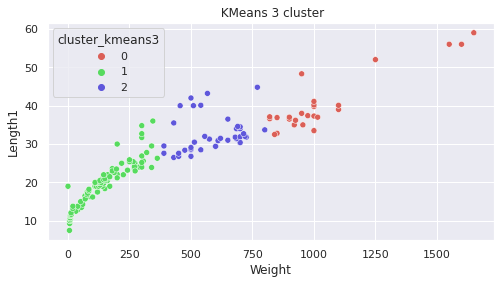

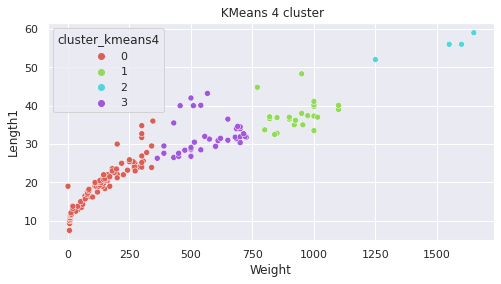

In [ ]:
## Tampilkan Plot
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['Weight'], data_cluster['Length1'], hue=data_cluster['cluster_kmeans3'], palette=sns.color_palette('hls',3))
plt.title(' KMeans 3 cluster')

plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['Weight'], data_cluster['Length1'], hue=data_cluster['cluster_kmeans4'], palette=sns.color_palette('hls',4))
plt.title(' KMeans 4 cluster')
plt.show()

2. Silhouette Score

Pengujian model dilakukan untuk mengetahui seberapa dekat relasi antara objek dalam sebuah cluster dan seberapa jauh sebuah cluster terpisah dengan cluster lain. Metode pengujian yang akan digunakan adalah Silhouette Coefficient. Metode silhouette coefficient merupakan gabungan dari dua metode yaitu metode cohesion yang berfungsi untuk mengukur seberapa dekat relasi antara objek dalam sebuah cluster, dan metode separation yang berfungsi untuk mengukur seberapa jauh sebuah cluster terpisah dengan cluster lain. 

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 5):
    model2 = KMeans(n_clusters=k, random_state=42)
    model2.fit(X)
    score = silhouette_score(X, model2.labels_)
    print("Silhouette Score for k = ", k, "is", score)
    silhouette_scores.append(score)

Silhouette Score for k =  2 is 0.5397787397787398
Silhouette Score for k =  3 is 0.44479166666666664
Silhouette Score for k =  4 is 0.22916666666666666


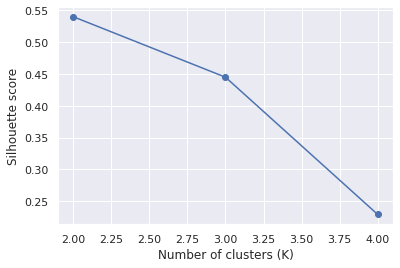

In [ ]:
plt.plot(range(2, 5), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette score')
plt.savefig('silhouette plot.png')